# Integração Numérica


## 9.1 Somas de Riemann



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

sp.init_printing()

x = sp.Symbol('x')
x_ = np.linspace(0, 1, 100)
y_ = np.sin(x_) * np.exp(-x_)

plt.plot(x_, y_)
plt.grid()
plt.show()

## 9.2 Regras de Newton-Cotes


In [2]:
def lagrangian_polynomial(x0, y0, x):
    n = len(x0)

    L = [1 for _ in range(n)]
    for k in range(n):
        for j in range(n):
            if (k != j):
                L[k] *= (x - x0[j])/(x0[k] - x0[j])
    p = 0
    for k in range(n):
        p += L[k] * y0[k]
    p = sp.simplify(p)
    return p

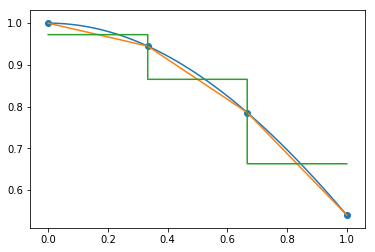

In [3]:
f = sp.cos(x)
x_axis = np.linspace(0, 1, 4)
y_axis = [f.subs(x, x0) for x0 in x_axis]
p = lagrangian_polynomial(x_axis, y_axis, x)
h = x_axis[1] - x_axis[0]

x_axis_3 = np.linspace(0, 1, 100)
y_axis_3 = [f.subs(x, x0) for x0 in x_axis_3]

x_axis_2 = x_axis + h - 0.000001
x_axis_2 = list(x_axis_2) + list(x_axis)
x_axis_2.sort()

# ponto medio
A = [(p.subs(x, x_axis[i]) + p.subs(x, x_axis[i+1]))/2 for i in range(len(x_axis) - 1)]
A += [np.nan]
A = list(A)
A2= []
for i in range(len(A)):
    A2.append(A[i]) 
    A2.append(A[i]) 

plt.plot(x_axis_3, y_axis_3)
plt.plot(x_axis, y_axis)
plt.scatter(x_axis, y_axis)
plt.plot(x_axis_2, A2)

In [4]:
def trapezio(x, y):
    s = 0
    n = len(x)
    for i in range(n-1):
        s += (x[i+1]-x[i])/2 * (y[i] + y[i+1])
    return s

In [5]:
x_axis = np.linspace(-2, 2, 100)
y_axis = np.exp(-x_axis**2/2) / (2*np.sqrt(np.pi))

s = 0
n = len(x_axis)
h = x_axis[1] - x_axis[0]
s += y_axis[0]
s += y_axis[n-1]
for i in range(1, n-1):
    s += 2*y_axis[i]
s *= h / 2
s



## Regra de Simpson

In [6]:
#(x[2]-x[0])/6 * (y[0] + 4*y[1] + y[2])

In [7]:
x = np.array([0, 0.2, 0.4, 0.6])
y = np.array([-1, -0.5, 1.3, 2])
n = len(x)


def simpson_integrate(x, y):
    s = 0
    n = len(x)
    n1 = n-(n%3)
    
    for i in range(2,n1,3):
        s += (x[i]-x[i-2])/6 * (y[i-2] + 4*y[i-1] + y[i])
    
    for j in range(n1-1, n-1):
        s += (x[j+1]-x[j])/2 * (y[j] + y[j+1])
    
    return s

simpson_integrate(x, y)

In [8]:
x = np.array([0, 0.5, 1])
y = np.exp(-x**2)

simpson_integrate(x, y)

In [9]:
x = np.array([0, 0.5, 1])
y = np.exp(-x)
simpson_integrate(x, y)

In [10]:
x = np.array([0, 0.5, 1])
y = x**2
simpson_integrate(x, y)

In [11]:
x = np.array([0, 0.5, 1])
y = x**3
simpson_integrate(x, y)

In [12]:
x = np.array([0, 0.5, 1])
y = x * np.exp(-x**2)
simpson_integrate(x, y)

In [13]:
for i in range(10, 100, 3):
    x = np.linspace(0, 1, i)
    y = 1/(x**2+0.1)
    
    print(f'n = {i}')
    print(simpson_integrate(x, y))
    print(trapezio(x, y))
    print()
    


n = 10
3.1336959931352677
3.997062820097476

n = 13
3.009183234903041
3.9978045010727135

n = 16
2.936830597854651
3.9981482720809773

n = 19
2.8899010305508392
3.9983351187943645

n = 22
2.8569609736388992
3.998447817836513

n = 25
2.8325273835863007
3.998520978508017

n = 28
2.813663185994308
3.9985711438959592

n = 31
2.7986505144032683
3.998607030234398

n = 34
2.7864150454912346
3.9986335838554594

n = 37
2.7762493076253008
3.9986537810810034

n = 40
2.7676679283607206
3.9986694998810695

n = 43
2.7603266098978407
3.9986819726472995

n = 46
2.753974246453067
3.998692035283424

n = 49
2.7484233410718213
3.9987002709764363

n = 52
2.743531036299368
3.9987070966282956

n = 55
2.7391865599986205
3.9987128166684247

n = 58
2.7353026870998494
3.99871765759336

n = 61
2.731809792781061
3.998721790736618

n = 64
2.728651622797638
3.998725347638841

n = 67
2.7257822285794413
3.9987284306441264

n = 70
2.7231637090293113
3.9987311203448

n = 73
2.7207645215525313
3.9987334809020783

n = 76


In [14]:

x = sp.Symbol('x')
f = 1/(x**2+0.1)
f = f.diff(x)
f.subs(x, 1) - f.subs(x, 0)

In [15]:
x = np.array([0, 0.5, 1])
y = x/(x**2+1)
simpson_integrate(x, y)

In [16]:
n = 3
a = 2
b = 5
for n in range(3, 11, 2):
    x = np.linspace(a, b, n)
    y = np.exp(4-x**2)
    print(f'n = {n}: {simpson_integrate(x, y)}')
print()
for n in range(3, 11, 2):
    x = np.linspace(a, b, n)
    y = np.exp(4-x**2)
    print(f'n = {n}: {simpson_integrate(x, y)}')

n = 3: 0.5005225174937314
n = 5: 0.2785316891940783
n = 7: 0.23810348348280788
n = 9: 0.22599987429087876

n = 3: 0.5005225174937314
n = 5: 0.2785316891940783
n = 7: 0.23810348348280788
n = 9: 0.22599987429087876


## Quadratura de Gauss-Legendre

In [32]:
x = sp.Symbol('x')
f = sp.exp(x)
a = -1
b = 1
float(sp.integrate(f).subs(x, b) - sp.integrate(f).subs(x, a))

f.subs(x, (b-1) - 1/np.sqrt(3)) + f.subs(x, (b-1) + 1/np.sqrt(3))